<a href="https://colab.research.google.com/github/minh041104/Final-Project-AIT2003-1/blob/main/Analyze_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Thư viện sử dụng**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

**Kiểm tra lại dữ liệu trước khi phân tích**

In [ ]:
df = pd.read_csv('clean_df.csv')
df.info()

In [ ]:
df['post_id'] = df['post_id'].astype('string')
df['post_text'] = df['post_text'].astype('string')
df['post_url'] = df['post_url'].astype('string')
df['reactions'] = df['reactions'].astype('string')
df['time'] = pd.to_datetime(df['time'])
df['fetched_time'] = pd.to_datetime(df['fetched_time'])
df.info()

**10 bài viết có nhiều reaction nhất**

In [19]:
# Lấy 10 bài viết có reaction lớn nhất
top_10react_posts = df.sort_values(by='reaction_count', ascending=False).head(10)

# Hiển thị thông tin của 10 bài viết có reaction lớn nhất
top_10react_posts['reaction_count']

72     38538
62     37173
68     19429
54     15330
43     12344
44     12075
50     10906
122    10783
98     10258
116     9841
Name: reaction_count, dtype: int64

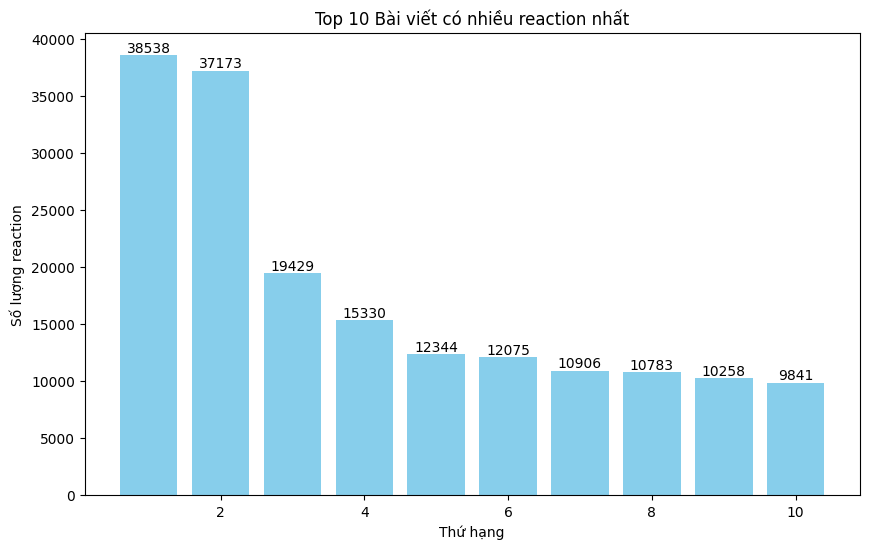

In [20]:
ranks = list(range(1, 11))

# Vẽ biểu đồ cột cho 10 bài viết có reaction lớn nhất và thêm nhãn số lượng reaction
plt.figure(figsize=(10, 6))
bars = plt.bar(ranks, top_10react_posts['reaction_count'], color='skyblue')
plt.title('Top 10 Bài viết có nhiều reaction nhất')
plt.xlabel('Thứ hạng')
plt.ylabel('Số lượng reaction')

# Thêm nhãn số lượng reaction trực tiếp lên các thanh cột
for i, value in enumerate(top_10react_posts['reaction_count']):
    plt.text(i + 1, value + 0.1, f'{value}', ha='center', va='bottom')

**Bài viết có nhiều reaction nhất**

In [21]:
# Lấy index của bài viết có nhiều reaction nhất
max_reaction_index = df['reaction_count'].idxmax()
# Lấy thông tin của bài viết có nhiều reaction nhất
max_reaction_post = df.loc[max_reaction_index]
print(max_reaction_post['post_url'])

https://facebook.com/thongtinchinhphu/posts/765583765606406


**10 bài viết có nhiều comment nhất**

In [22]:
# Lấy 10 bài viết có comment lớn nhất
top_10comment_posts = df.sort_values(by='comments', ascending=False).head(10)

# Hiển thị thông tin của 10 bài viết có comment lớn nhất
top_10comment_posts['comments']

54     1545
43     1004
72      814
62      786
18      635
16      586
68      454
106     397
61      392
26      327
Name: comments, dtype: int64

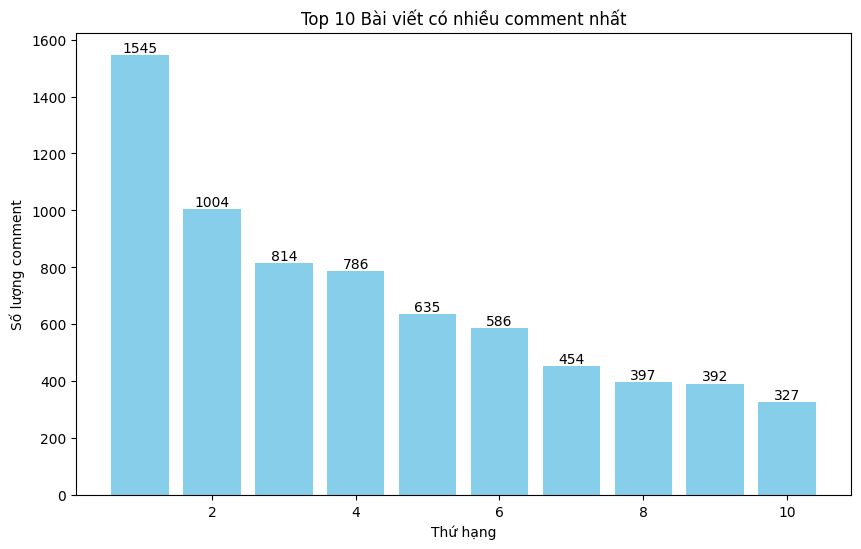

In [23]:
# Vẽ biểu đồ cột cho 10 bài viết có comment lớn nhất và thêm nhãn số lượng comment
plt.figure(figsize=(10, 6))
bars = plt.bar(ranks, top_10comment_posts['comments'], color='skyblue')
plt.title('Top 10 Bài viết có nhiều comment nhất')
plt.xlabel('Thứ hạng')
plt.ylabel('Số lượng comment')

# Thêm nhãn số lượng comment trực tiếp lên các thanh cột
for i, value in enumerate(top_10comment_posts['comments']):
    plt.text(i + 1, value + 0.1, f'{value}', ha='center', va='bottom')

**Bài viết có nhiều comment nhất**

In [24]:
# Lấy index của bài viết có nhiều comment nhất
max_comment_index = df['comments'].idxmax()
# Lấy thông tin của bài viết có nhiều comment nhất
max_comment_post = df.loc[max_comment_index]
print(max_comment_post['post_url'])

https://facebook.com/thongtinchinhphu/posts/766226742208775


**10 bài viết có nhiều share nhất**

In [25]:
# Lấy 10 bài viết có share lớn nhất
top_10share_posts = df.sort_values(by='shares', ascending=False).head(10)

# Hiển thị thông tin của 10 bài viết có share lớn nhất
top_10share_posts['shares']

92     2707
72     1843
61     1460
62     1293
54     1008
31      558
68      373
126     367
101     313
18      292
Name: shares, dtype: int64

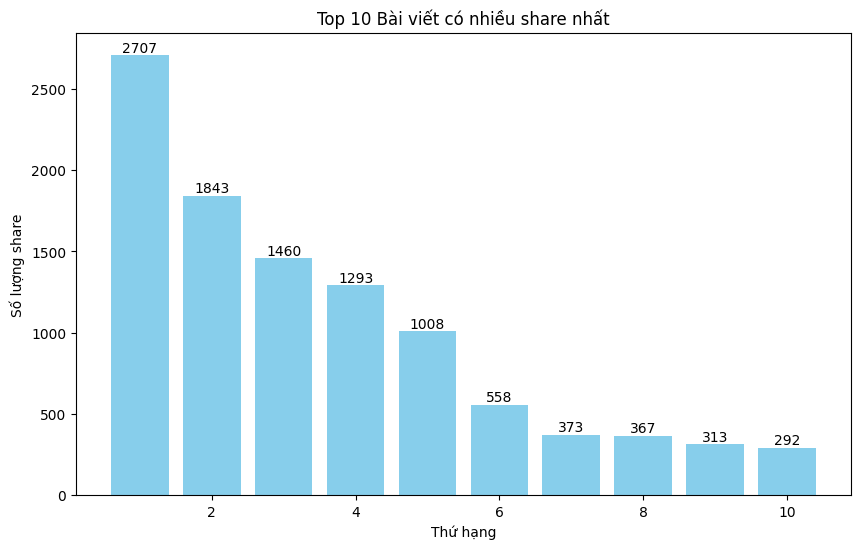

In [26]:
# Vẽ biểu đồ cột cho 10 bài viết có share lớn nhất và thêm nhãn số lượng share
plt.figure(figsize=(10, 6))
bars = plt.bar(ranks, top_10share_posts['shares'], color='skyblue')
plt.title('Top 10 Bài viết có nhiều share nhất')
plt.xlabel('Thứ hạng')
plt.ylabel('Số lượng share')

# Thêm nhãn số lượng share trực tiếp lên các thanh cột
for i, value in enumerate(top_10share_posts['shares']):
    plt.text(i + 1, value + 0.1, f'{value}', ha='center', va='bottom')

**Bài viết có nhiều share nhất**

In [27]:
# Lấy index của bài viết có nhiều share nhất
max_share_index = df['shares'].idxmax()
# Lấy thông tin của bài viết có nhiều share nhất
max_share_post = df.loc[max_share_index]
print(max_share_post['post_url'])

https://facebook.com/thongtinchinhphu/posts/764627912368658


**Reaction nào được sử dụng nhiều nhất**

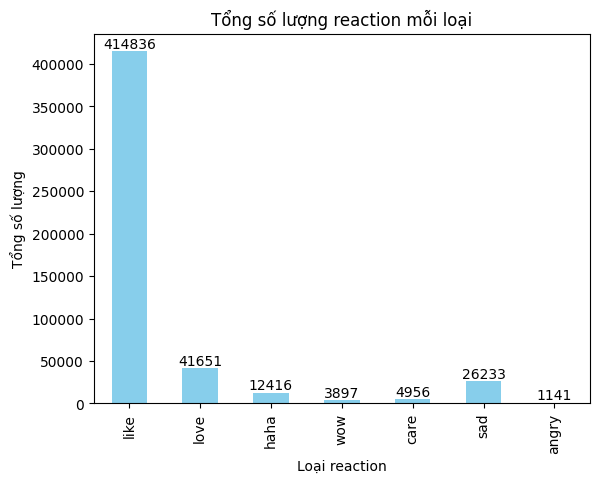

In [28]:
# Tính tổng số lượng reaction cho mỗi cột
emotion_totals = df[['like', 'love', 'haha', 'wow', 'care', 'sad' , 'angry']].sum()
# Vẽ biểu đồ cột
emotion_totals.plot(kind='bar', color='skyblue')
plt.title('Tổng số lượng reaction mỗi loại')
plt.xlabel('Loại reaction')
plt.ylabel('Tổng số lượng')
for i, value in enumerate(emotion_totals):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

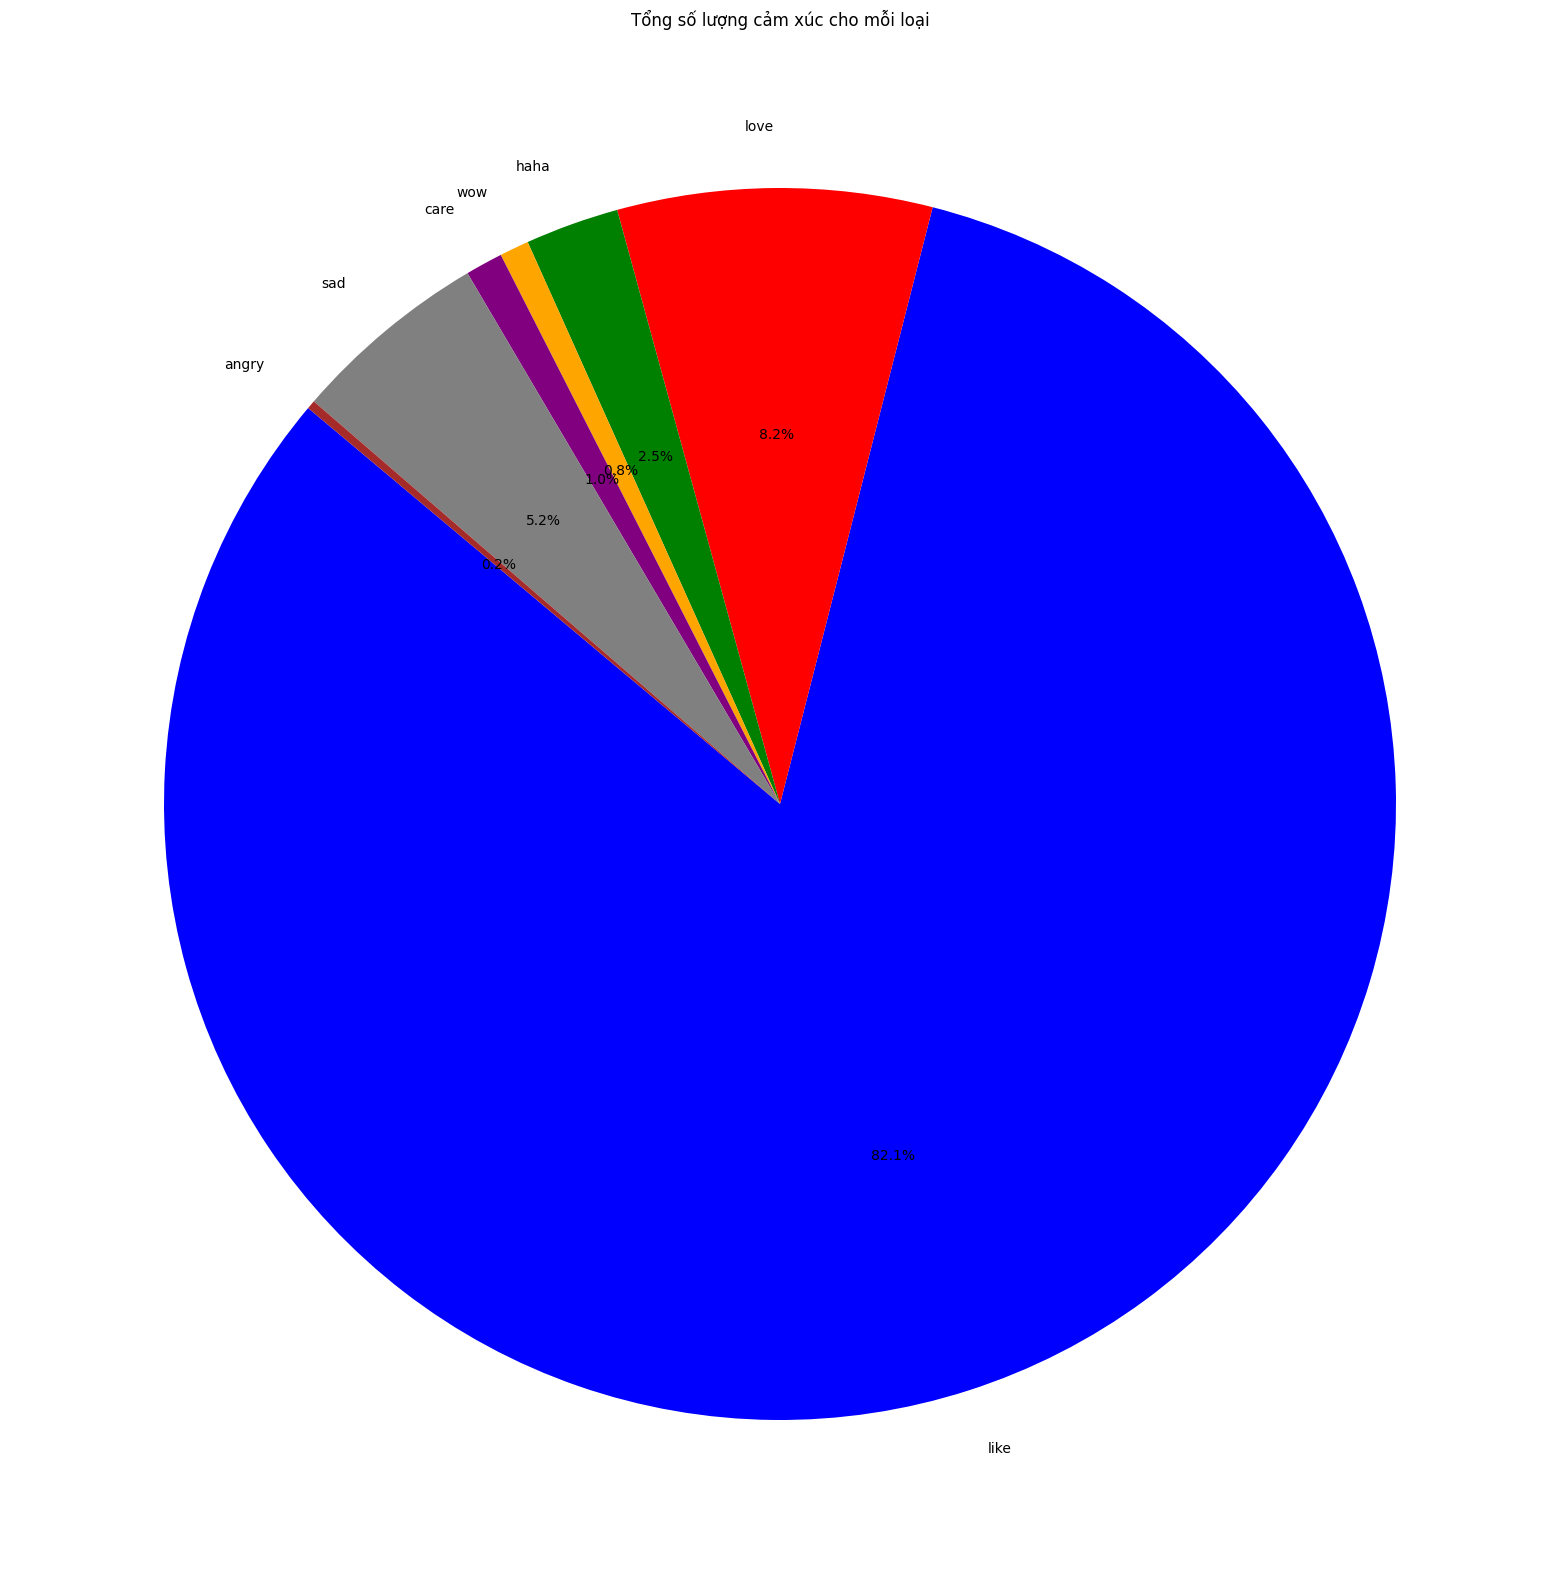

In [29]:
# Biểu đồ tròn
plt.figure(figsize=(20, 20))
plt.pie(emotion_totals, labels=emotion_totals.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green', 'orange', 'purple', 'gray', 'brown'])
plt.title('Tổng số lượng cảm xúc cho mỗi loại')
plt.show()

**Trung bình mỗi bài viết có bao nhiêu reaction**

In [30]:
# Tính trung bình số lượng reaction mỗi bài viết
average_reaction_per_post = df['reaction_count'].mean()
average_reaction_per_post

3826.742424242424

**Trung bình số lượng mỗi loại reaction trong mỗi bài viết**

In [31]:
# Tính trung bình số lượng mỗi loại reaction trong mỗi bài viết
average_reaction_per_type = df[['like', 'love', 'haha', 'wow',
'care', 'sad', 'angry']].mean()
average_reaction_per_type

like     3142.696970
love      315.537879
haha       94.060606
wow        29.522727
care       37.545455
sad       198.734848
angry       8.643939
dtype: float64

**Tạo cột “day” thể hiện ngày đăng bài**

In [32]:
df['day'] = df['time'].dt.to_period('D')
df['day'] = df['day'].dt.to_timestamp()

**Tính tổng số lượng reaction mỗi ngày**

In [33]:
# Tính tổng số lượng reaction mỗi ngày
daily_reaction_count = df.groupby('day')['reaction_count'].sum()

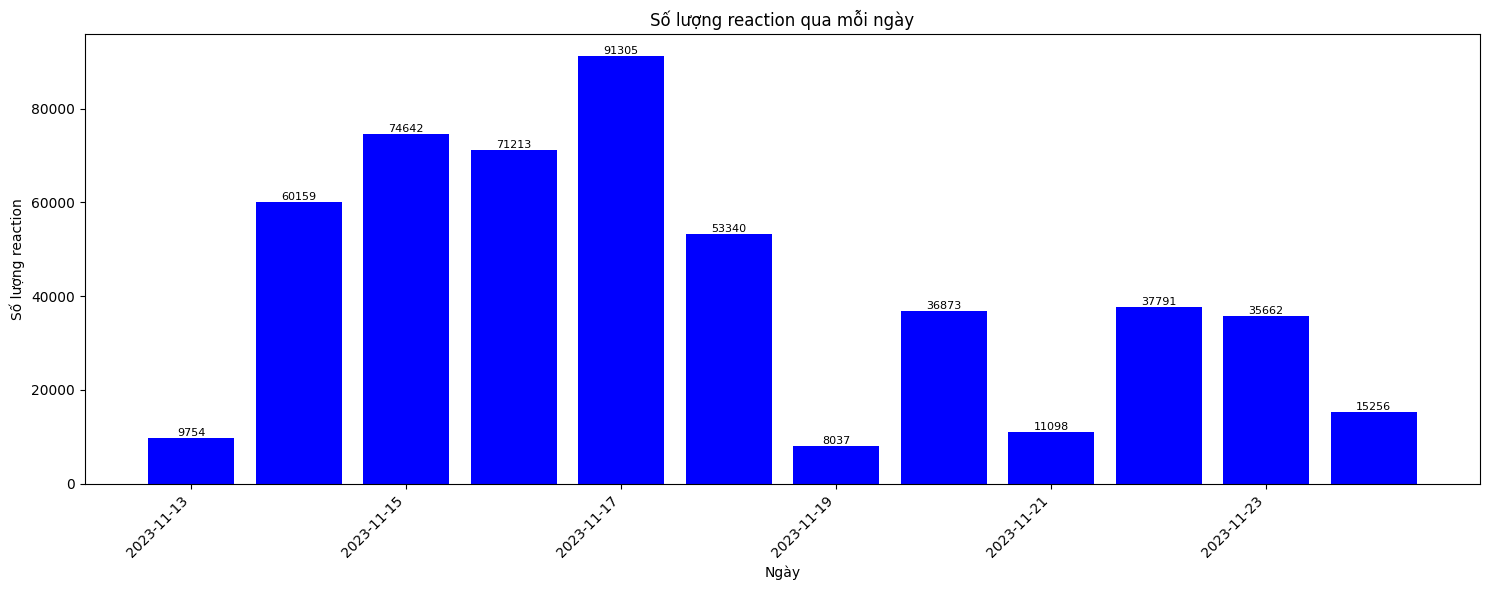

In [34]:
# Visualize số lượng reaction qua mỗi ngày
plt.figure(figsize=(15, 6))
bars = plt.bar(daily_reaction_count.index, daily_reaction_count.values, color='blue')

# Thêm giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.title('Số lượng reaction qua mỗi ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng reaction')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Trung bình mỗi ngày trong tuần có bao nhiêu reaction**

In [36]:
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
# Tạo cột weekday thể hiện ngày trong tuần
df['weekday'] = df['time'].dt.weekday
avg_reaction_per_day = df.groupby('weekday')['reaction_count'].mean().sort_index()
avg_reaction_per_day.rename(index = weekdays, inplace = True)
avg_reaction_per_day

weekday
Monday       4238.818182
Tuesday      3238.954545
Wednesday    3306.852941
Thursday     3685.344828
Friday       4440.041667
Saturday     5926.666667
Sunday       2679.000000
Name: reaction_count, dtype: float64

Text(0, 0.5, 'Lượng reaction trung bình')

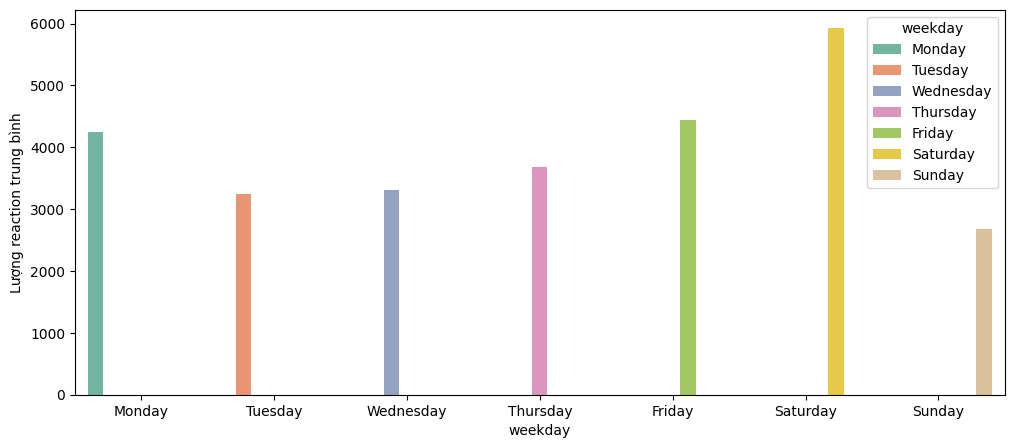

In [37]:
plt.figure(figsize=(12, 5))
sns.barplot(x = avg_reaction_per_day.index, y = avg_reaction_per_day.values, hue = avg_reaction_per_day.index, palette = "Set2")
plt.xlabel('weekday')
plt.ylabel('Lượng reaction trung bình')

**Phân bố xác suất của lượng reaction**

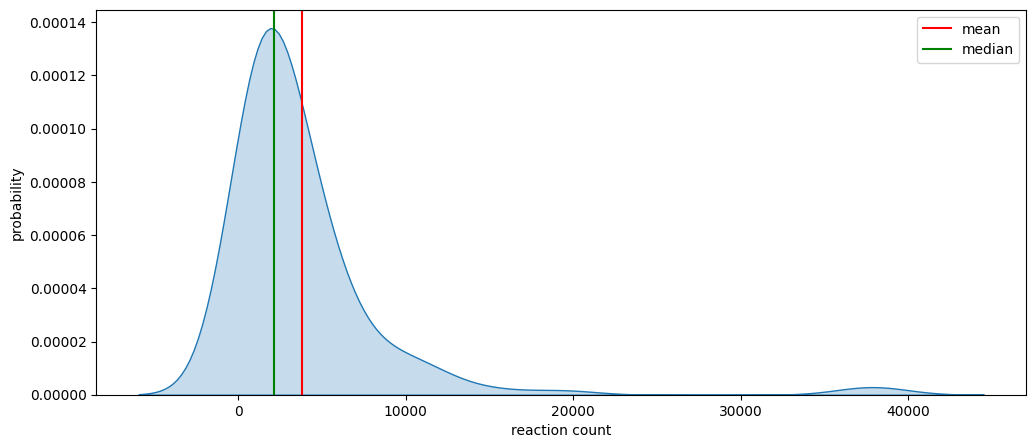

In [38]:
plt.figure(figsize=(12, 5))
sns.kdeplot(df["reaction_count"], fill=True)
plt.axvline(df["reaction_count"].mean(), color="red", label="mean")
plt.axvline(df["reaction_count"].median(), color="green", label="median")
plt.xlabel("reaction count")
plt.ylabel("probability")
plt.legend()

**Trung bình mỗi bài viết có bao nhiêu comment**

In [39]:
average_comments_per_post = df['comments'].mean()
average_comments_per_post

116.66666666666667

**Tính tổng số lượng comment mỗi ngày**

In [40]:
daily_comment_count = df.groupby('day')['comments'].sum()

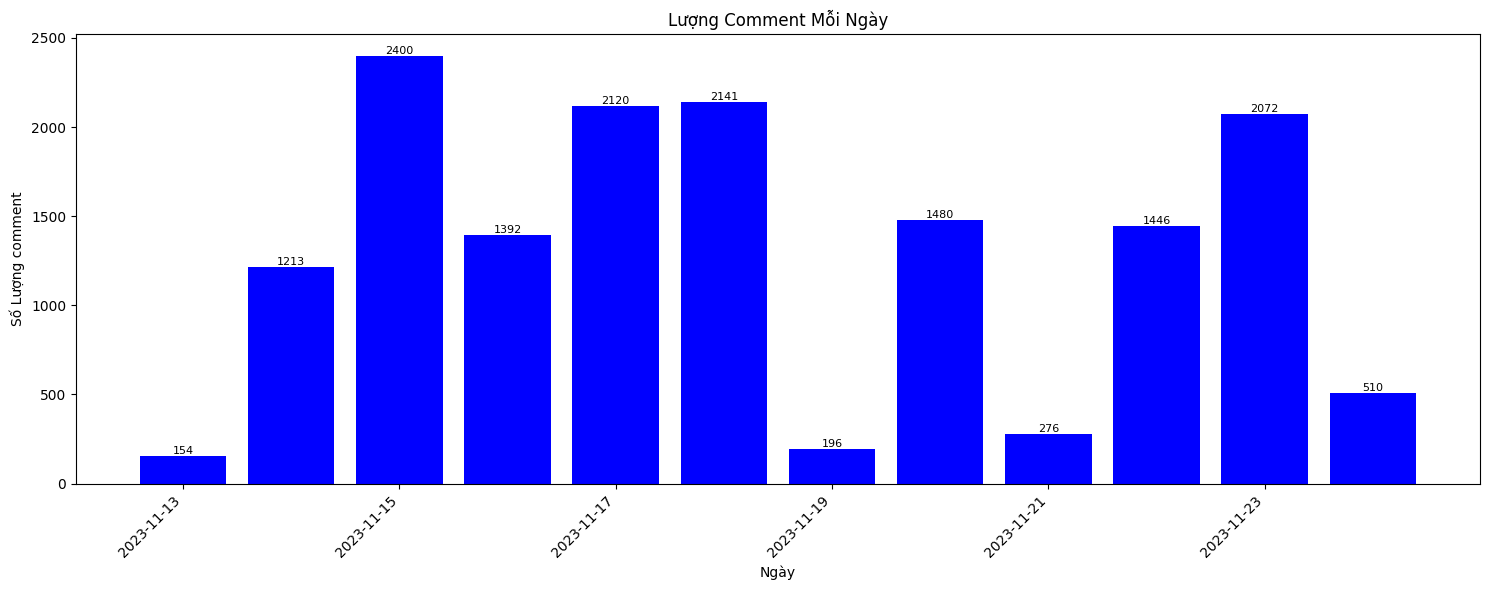

In [41]:
# Visualize số lượng reaction qua mỗi ngày
plt.figure(figsize=(15, 6))
bars = plt.bar(daily_comment_count.index, daily_comment_count.values, color='blue')

# Thêm giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.title('Lượng Comment Mỗi Ngày')
plt.xlabel('Ngày')
plt.ylabel('Số Lượng comment')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Số bài đăng trong 24 giờ**

In [42]:
df['hour'] = df['time'].dt.hour

In [43]:
# Tính tần suất đăng bài của mỗi giờ
hourly_post_frequency = df['hour'].value_counts().sort_index()

In [44]:
# Tính giá trị trung bình của tần suất đăng bài
mean = df['hour'].value_counts().mean() * np.ones(len(hourly_post_frequency))

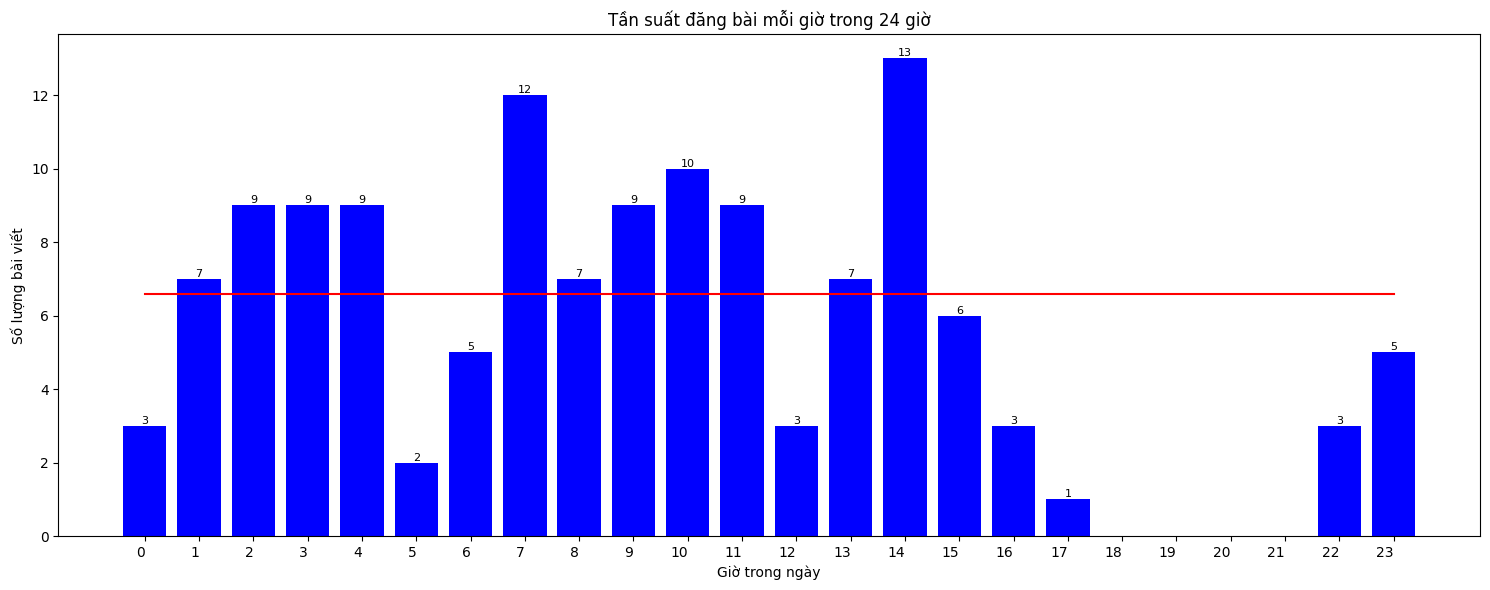

In [45]:
# # Visualize tần suất đăng bài mỗi giờ
plt.figure(figsize=(15, 6))
bars = plt.bar(hourly_post_frequency.index, hourly_post_frequency.values, color='blue')
plt.plot(hourly_post_frequency.index, mean, color = 'red', label= 'Average posts')
# Thêm giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.title('Tần suất đăng bài mỗi giờ trong 24 giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng bài viết')
plt.xticks(range(24), ha="right")
plt.tight_layout()
plt.show()

**Số bài đăng mỗi ngày**

In [46]:
# Số lượng bài viết mỗi ngày
daily_post_count = df.groupby('day')['post_id'].count()

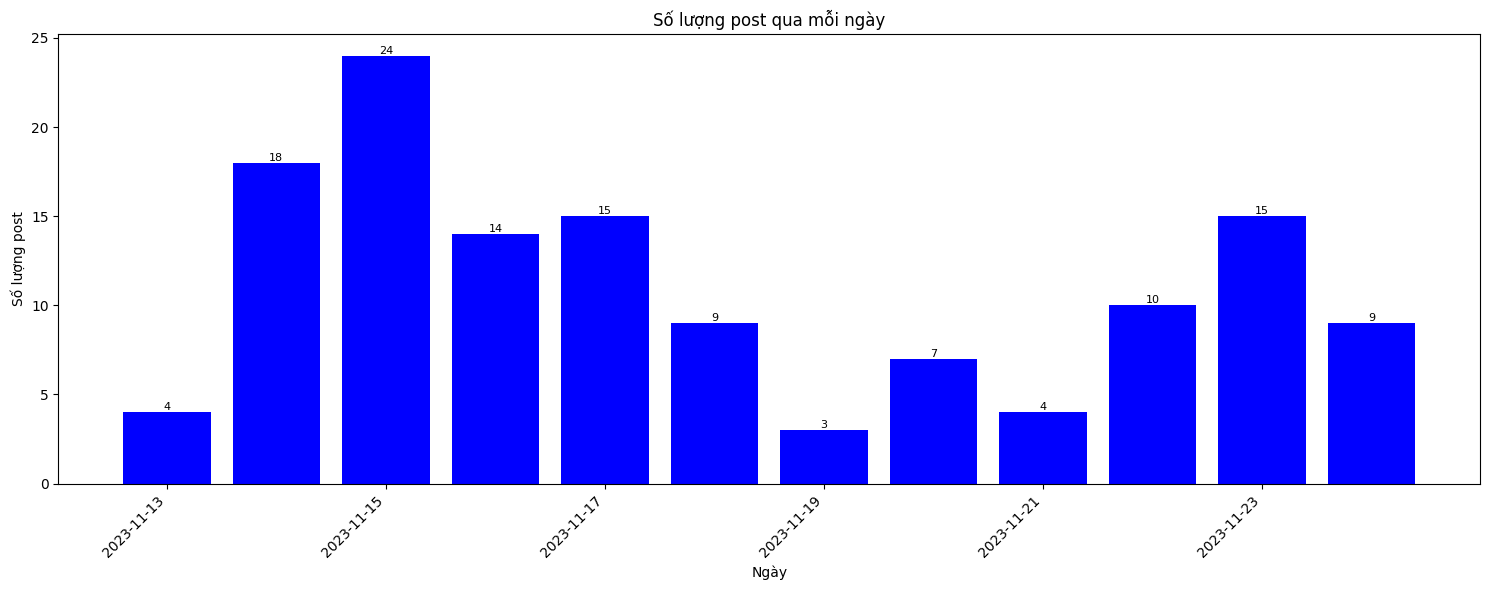

In [47]:
# Visualize tần suất đăng bài mỗi ngày
plt.figure(figsize=(15, 6))
bars = plt.bar(daily_post_count.index, daily_post_count.values, color='blue')

# Thêm giá trị trên cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.title('Số lượng post qua mỗi ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng post')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Số bài đăng trong tuần**

In [48]:
posts_per_day = df['weekday'].value_counts().sort_index().rename(index=weekdays)
posts_per_day

Monday       11
Tuesday      22
Wednesday    34
Thursday     29
Friday       24
Saturday      9
Sunday        3
Name: weekday, dtype: int64

Text(0, 0.5, 'Số lượng bài viết')

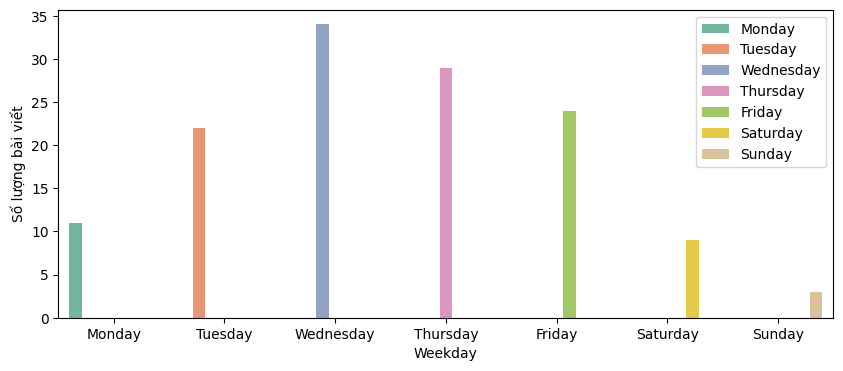

In [49]:
plt.figure(figsize=(10,4))
sns.barplot(x = posts_per_day.index, y = posts_per_day.values, hue = posts_per_day.index, palette = "Set2")
plt.xlabel(xlabel = "Weekday")
plt.ylabel(ylabel = "Số lượng bài viết")

**Top 10 từ xuất hiện nhiều nhất trong tiêu đề bài đăng**

In [50]:
# Sử dụng regular expression để tách từ và loại bỏ các kí tự đặc biệt
tokenizer = RegexpTokenizer(r'\b\w+\b')
df['words'] = df['post_text'].apply(lambda x: tokenizer.tokenize(x))

# Kết hợp tất cả từ đã lọc
all_filtered_words = [word for words in df['words'] for word in words]

# Đếm tần suất xuất hiện của từng từ
word_counts = Counter(all_filtered_words)

# Lấy 10 từ xuất hiện nhiều nhất
top_keywords = word_counts.most_common(10)

print("Top 10 từ xuất hiện nhiều nhất:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count} lần")

Top 10 từ xuất hiện nhiều nhất:
và: 234 lần
các: 232 lần
của: 154 lần
Việt: 139 lần
Nam: 136 lần
tại: 127 lần
nước: 116 lần
có: 113 lần
đã: 100 lần
là: 96 lần


**Tạo word cloud từ tiêu đề các bài đăng (100 từ)**

(-0.5, 1999.5, 1199.5, -0.5)

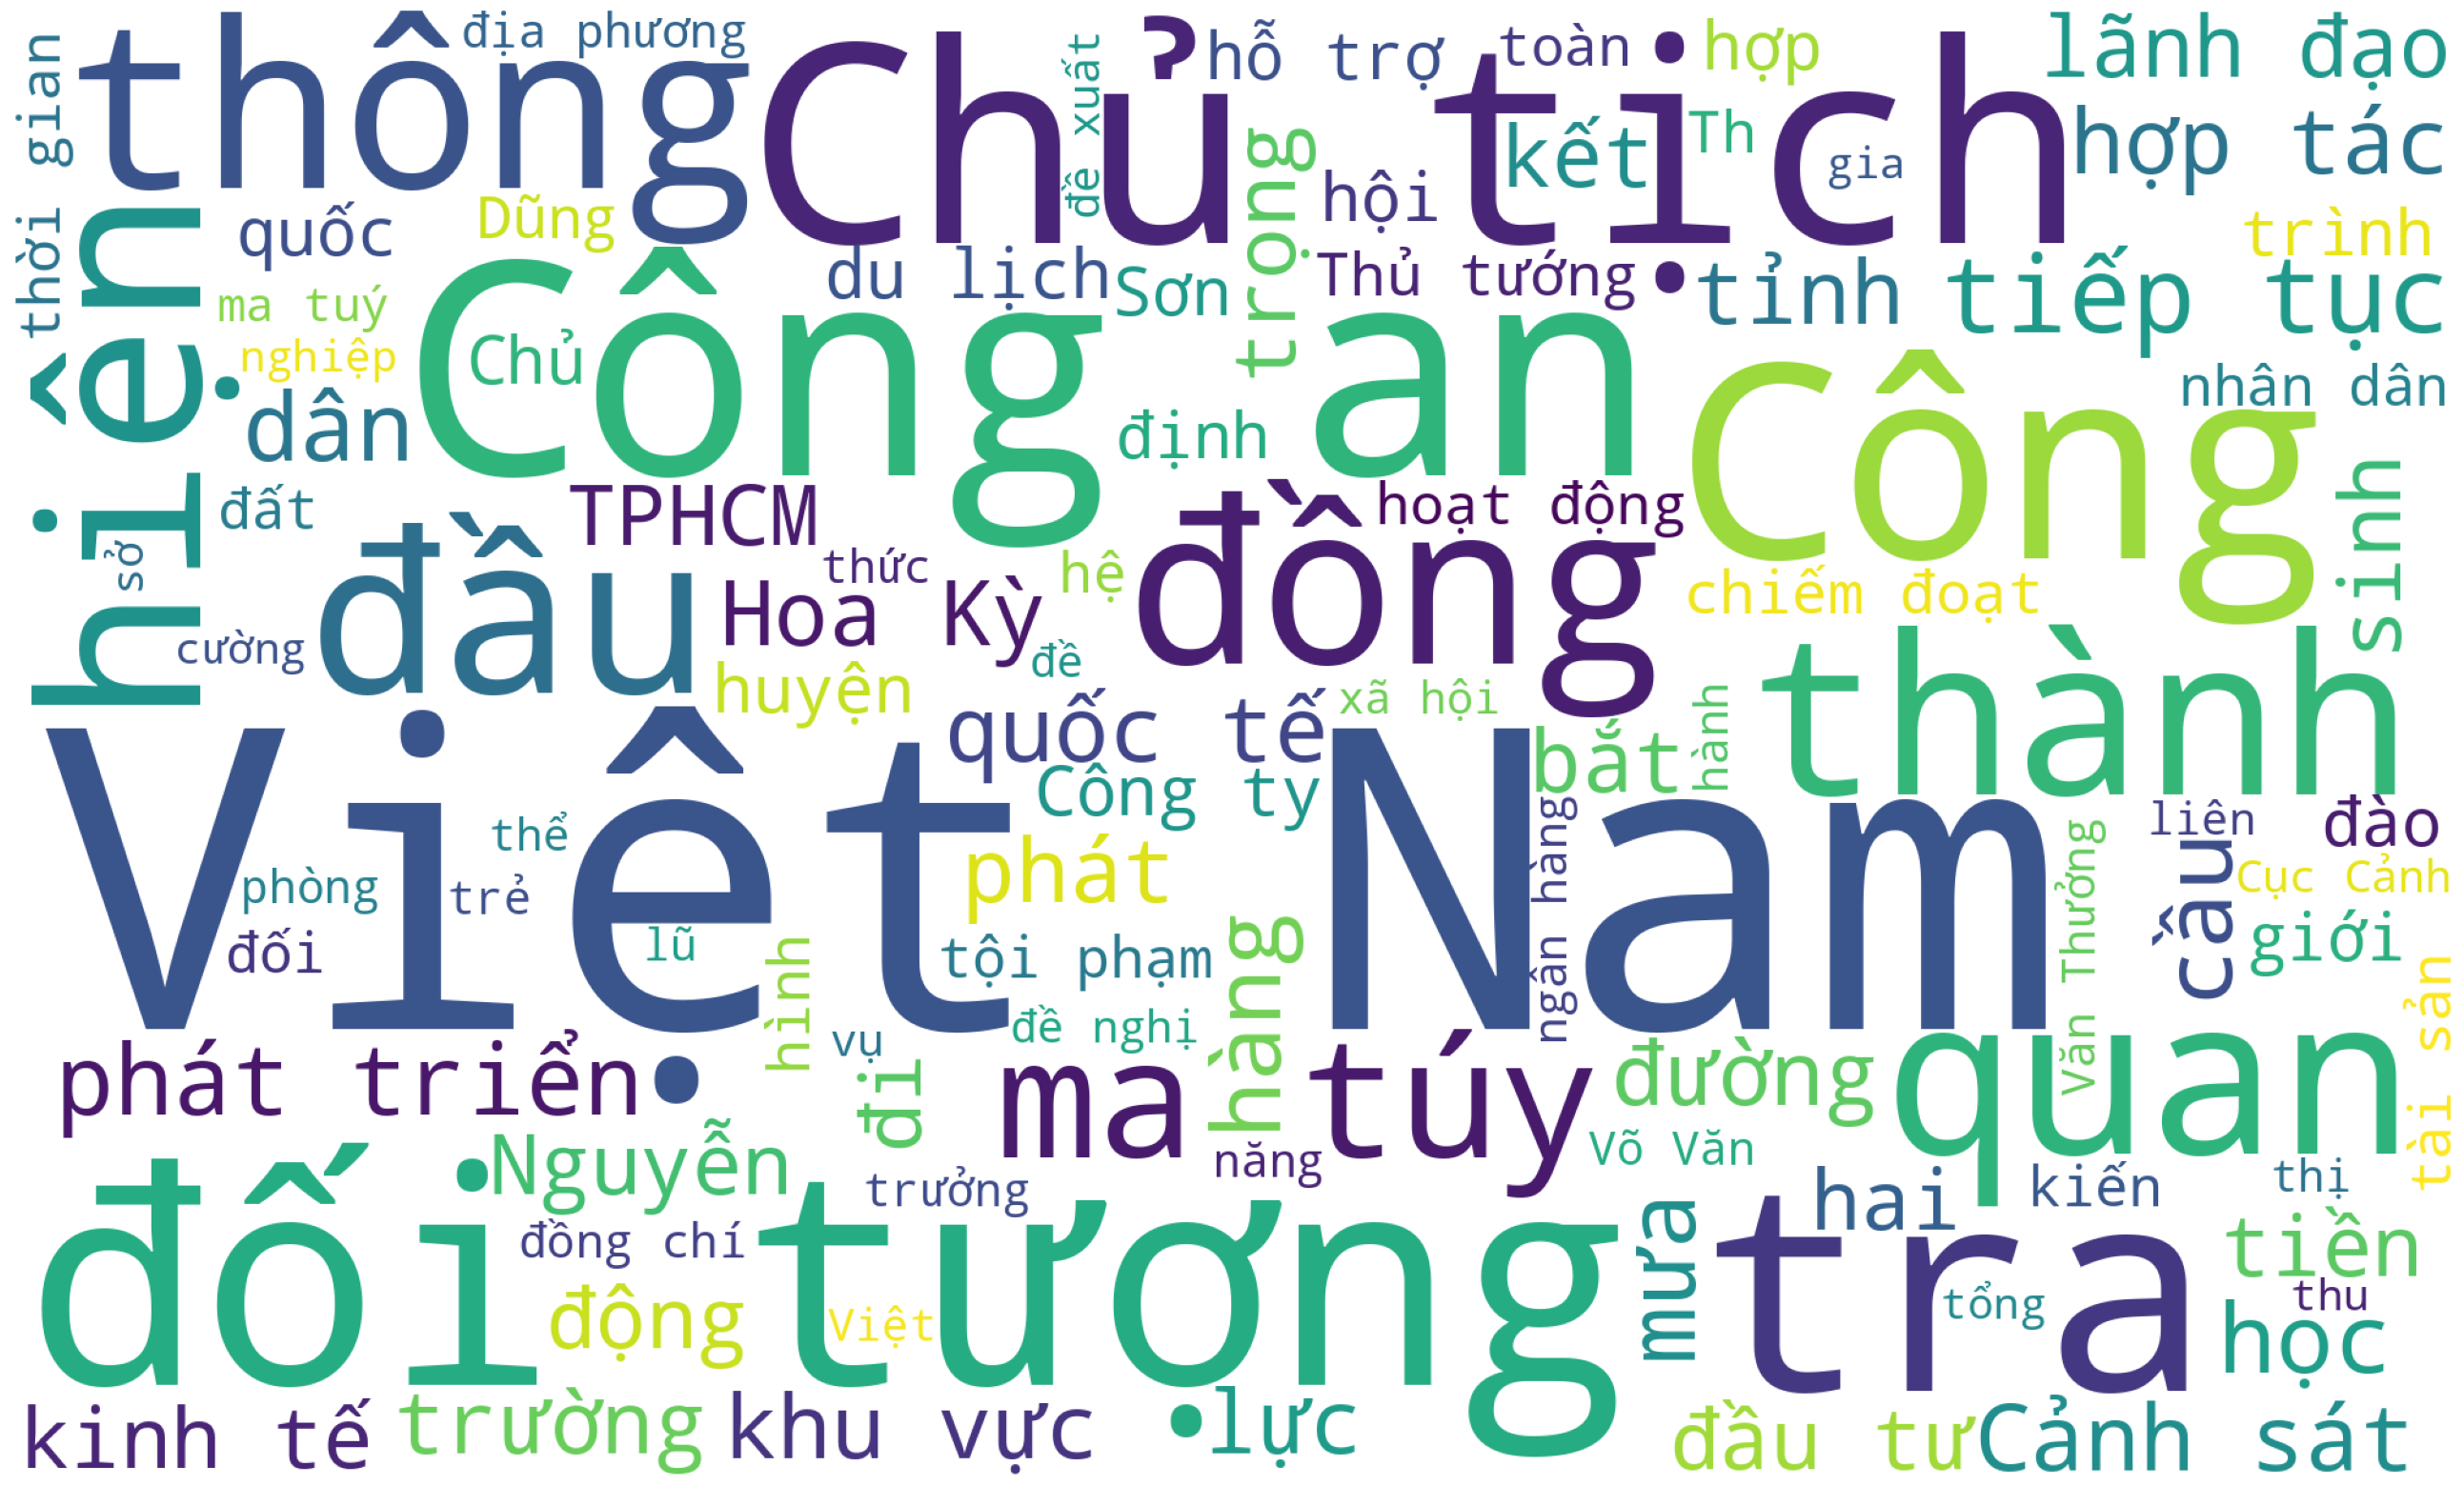

In [51]:
df_text = df[['post_id','post_text']]
text = str(df_text['post_text'])

stopwords_file_path = 'vietnamese-stopwords.txt'
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    vietnamese_stopwords = set(file.read().splitlines())

all_text_combined = ' '.join(df['post_text'].astype(str))

wordcloud_vietnamese = WordCloud(stopwords=vietnamese_stopwords,
                                 background_color='white',
                                 max_words=100,
                                 width=2000, height=1200,
                                 min_font_size= 6,
                                 ).generate(all_text_combined)

plt.figure(figsize=(40, 20))
plt.imshow(wordcloud_vietnamese)
plt.axis('off')

**Mối tương quan giữa tần suất đăng bài và lượng reaction mỗi ngày**

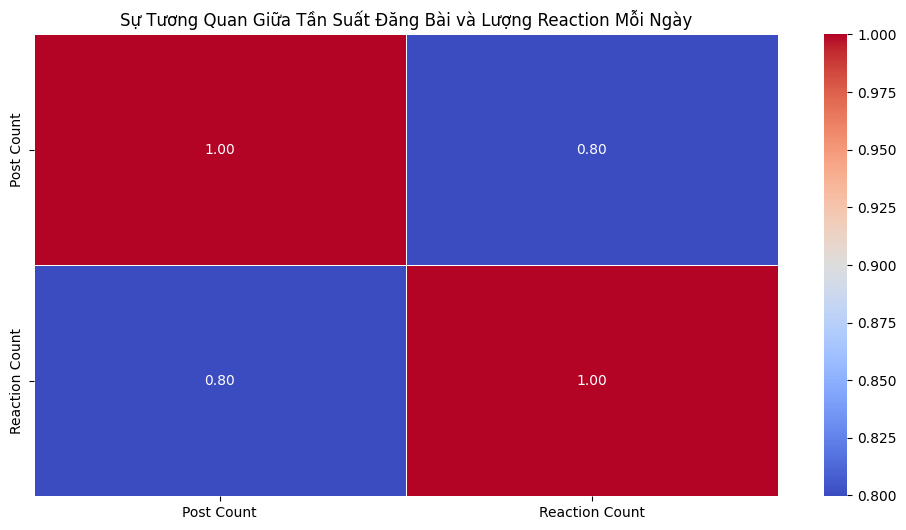

In [52]:
daily_metrics_react = pd.DataFrame({
    'Post Count': daily_post_count,
    'Reaction Count': daily_reaction_count
})

# Vẽ biểu đồ tương quan
plt.figure(figsize=(12, 6))
sns.heatmap(daily_metrics_react.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Sự Tương Quan Giữa Tần Suất Đăng Bài và Lượng Reaction Mỗi Ngày')
plt.show()

**Mối tương quan giữa tần suất đăng bài và lượng comment mỗi ngày**

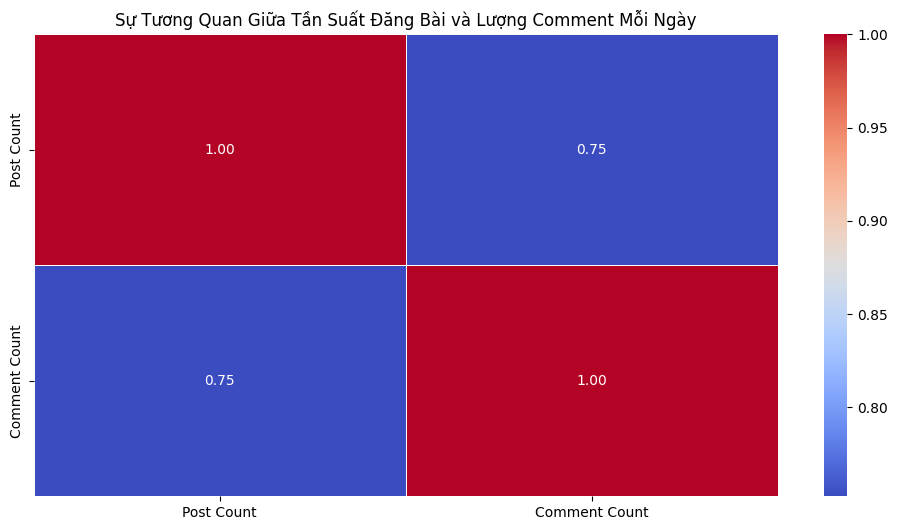

In [53]:
daily_metrics_comment = pd.DataFrame({
    'Post Count': daily_post_count,
    'Comment Count': daily_comment_count
})

# Vẽ biểu đồ tương quan
plt.figure(figsize=(12, 6))
sns.heatmap(daily_metrics_comment.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Sự Tương Quan Giữa Tần Suất Đăng Bài và Lượng Comment Mỗi Ngày')
plt.show()

**Mối tương quan giữa lượng reaction và comment mỗi bài viết**

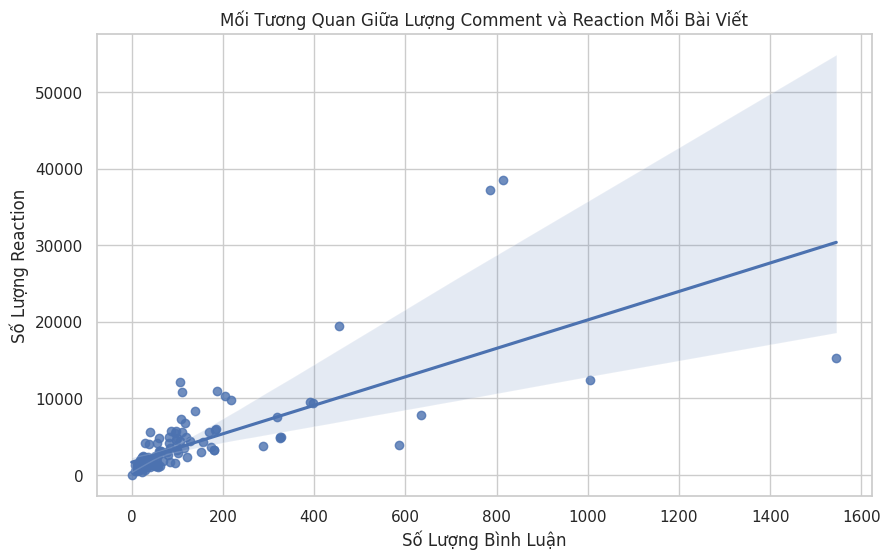

In [54]:
# Thiết lập các thiết lập mặc định của seaborn để cải thiện thẩm mỹ của biểu đồ
sns.set(style="whitegrid", color_codes=True)

# Vẽ biểu đồ tương quan
plt.figure(figsize=(10, 6))
sns.regplot(x='comments', y='reaction_count', data=df)
plt.title('Mối Tương Quan Giữa Lượng Comment và Reaction Mỗi Bài Viết')
plt.xlabel('Số Lượng Bình Luận')
plt.ylabel('Số Lượng Reaction')
plt.show()

**Mối tương quan tổng thể**

<ipython-input-55-b7d12ae9fa85>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-55-b7d12ae9fa85>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt= '.1f')


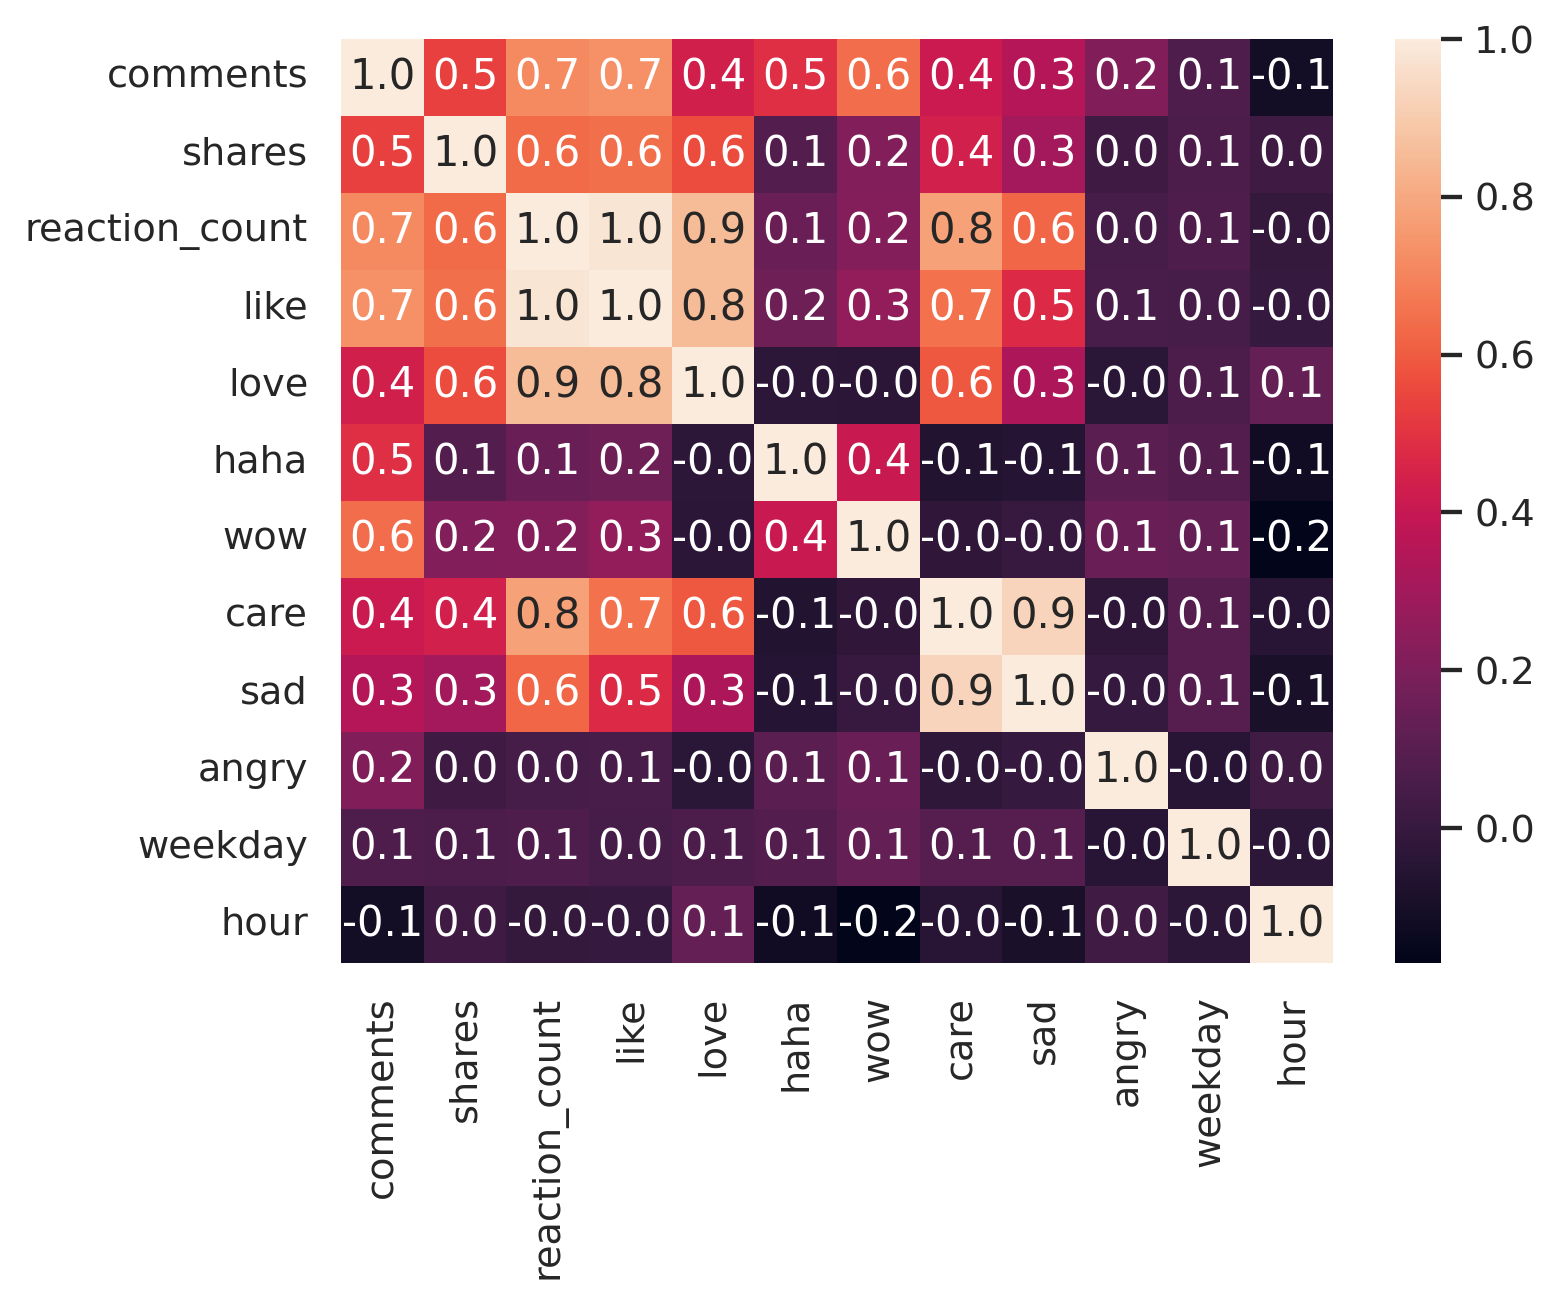

In [55]:
#correlation
corr = df.corr()

plt.figure(dpi=250)
sns.heatmap(df.corr(), annot=True, fmt= '.1f')
plt.show()